# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [1]:
#подключим ВСЕ необходимые Библиотеки
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import joblib


прочитаем данные и ознакомимся с ними

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')
df.head()


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


**is_ultra 1** - У клиента подключен тариф "Ультра"

**is_ultra 0** - У клиента подключен тариф "Смарт"

In [3]:
desc = df.describe()

df.info()
desc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


## Разбейте данные на выборки

In [4]:
#с помощью train_test_split  мы сможем Разделить наш датасет на следующие выборки
df_train, df_valid = train_test_split(df, test_size = 0.30, random_state = 12345)
df_valid, df_test = train_test_split(df_valid, test_size = 0.30, random_state = 12345)

print("Размер обучающий выборки:", df_train.shape[0],"объекта")
print("Размер Валидиоционной выборке:", df_valid.shape[0], "объектов")
print("Размер тестовой выборки:", df_test.shape[0], "объектов")

Размер обучающий выборки: 2249 объекта
Размер Валидиоционной выборке: 675 объектов
Размер тестовой выборки: 290 объектов


## Исследуйте модели

In [5]:
# Присвоим переменным прищнаки и целевые признаки
features = df.drop(['is_ultra'], axis = 1)
target = df['is_ultra']

#Валидиоционные Выборки
valid_features = df_valid.drop(['is_ultra'], axis = 1)
valid_target = df_valid['is_ultra']

#обучающая Выборка
train_features = df_train.drop(['is_ultra'], axis = 1)
train_target = df_train['is_ultra']

#Тестовая Выборка
test_features = df_test.drop(['is_ultra'], axis = 1)
test_targets = df_test['is_ultra']

Depth: 1              Accuracy: 0.7422222222222222
Depth: 2              Accuracy: 0.7792592592592592
Depth: 3              Accuracy: 0.7851851851851852
Depth: 4              Accuracy: 0.7807407407407407
Depth: 5              Accuracy: 0.7511111111111111
Depth: 6              Accuracy: 0.7851851851851852
Depth: 7              Accuracy: 0.7851851851851852
Depth: 8              Accuracy: 0.7837037037037037
Depth: 9              Accuracy: 0.7822222222222223
Depth: 10              Accuracy: 0.7822222222222223
Depth: 11              Accuracy: 0.7807407407407407
Depth: 12              Accuracy: 0.7837037037037037
Depth: 13              Accuracy: 0.7674074074074074
Depth: 14              Accuracy: 0.7659259259259259




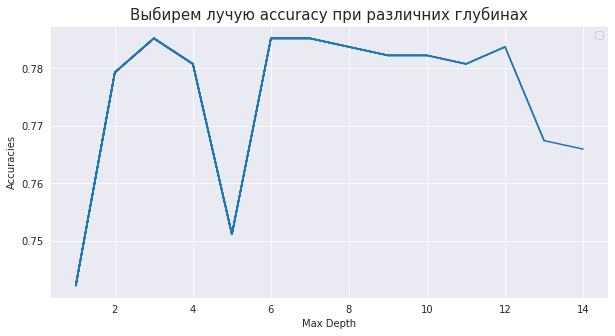

In [6]:
#Обучим модель Дерево Решений и проверим разные глубины

depths = []
DTC_accuracies = []

plt.figure(figsize = (10, 5))

for depth in range(1, 15):
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth)
    model.fit(train_features, train_target)
    predictions = model.predict(valid_features)
    score = accuracy_score(valid_target, predictions)
    depths.append(depth)
    DTC_accuracies.append(score)
    print('Depth:',depth,end = '')
    print("              Accuracy:", score)
    sns.lineplot(data = pd.DataFrame(data = DTC_accuracies, index = depths), dashes = False)
    plt.legend('')
print("\n")
plt.title("Выбирем лучую accuracy при различних глубинах", fontsize = 15)
plt.ylabel('Accuracies')
plt.xlabel('Max Depth')
plt.show()

print('\n\n')

Depth: 1              Accuracy: 0.7851851851851852
Depth: 2              Accuracy: 0.7837037037037037
Depth: 3              Accuracy: 0.7851851851851852
Depth: 4              Accuracy: 0.7837037037037037
Depth: 5              Accuracy: 0.7866666666666666
Depth: 6              Accuracy: 0.7837037037037037
Depth: 7              Accuracy: 0.7851851851851852
Depth: 8              Accuracy: 0.7837037037037037
Depth: 9              Accuracy: 0.7837037037037037




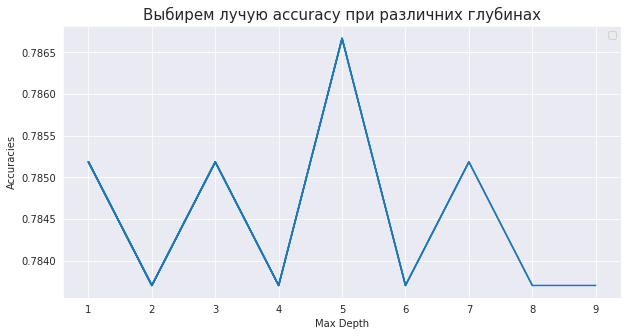

In [7]:
#Обучим модель Дерево Решений и проверим разные глубины

depths = []
DTC_accuracies = []

plt.figure(figsize = (10, 5))

for depth in range(1, 10):
    model = DecisionTreeClassifier(class_weight = None, criterion = 'gini', 
                                   max_depth = 7)

    model.fit(train_features, train_target)
    predictions = model.predict(valid_features)
    score = accuracy_score(valid_target, predictions)
    depths.append(depth)
    DTC_accuracies.append(score)
    print('Depth:',depth,end = '')
    print("              Accuracy:", score)
    sns.lineplot(data = pd.DataFrame(data = DTC_accuracies, index = depths), dashes = False)
    plt.legend('')
print("\n")
plt.title("Выбирем лучую accuracy при различних глубинах", fontsize = 15)
plt.ylabel('Accuracies')
plt.xlabel('Max Depth')
plt.show()

print('\n\n')

Estimator=: 10             Accuracy: 0.7703703703703704
Estimator=: 15             Accuracy: 0.7718518518518519
Estimator=: 20             Accuracy: 0.7822222222222223
Estimator=: 25             Accuracy: 0.7762962962962963
Estimator=: 30             Accuracy: 0.7792592592592592
Estimator=: 35             Accuracy: 0.7807407407407407
Estimator=: 40             Accuracy: 0.7851851851851852
Estimator=: 45             Accuracy: 0.7792592592592592
Estimator=: 50             Accuracy: 0.7777777777777778




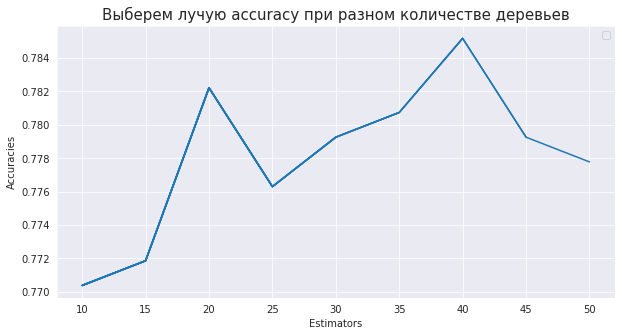

In [8]:
#обучим модель случайный лес с разним количеством деревьев в лесу

estimators = []
RFC_accuracies = []

plt.figure(figsize = (10, 5))

for estim in range(10,51,5):
    model = RandomForestClassifier(random_state = 12345, n_estimators = estim)
    model.fit(train_features, train_target)
    predictions = model.predict(valid_features)
    score = accuracy_score(valid_target, predictions)
    estimators.append(estim)
    RFC_accuracies.append(score)
    print('Estimator=:', estim, end= '')
    print('             Accuracy:', score)
    sns.lineplot(data= pd.DataFrame( data= RFC_accuracies, index = estimators), legend = 'brief')
    plt.legend('')
    
print('\n')
plt.title('Выберем лучую accuracy при разном количестве деревьев',  fontsize = 15)
plt.ylabel('Accuracies')
plt.xlabel('Estimators')
plt.show()

print('\n\n')

Estimator=: 10             Accuracy: 0.7703703703703704
Estimator=: 15             Accuracy: 0.7718518518518519
Estimator=: 20             Accuracy: 0.7822222222222223
Estimator=: 25             Accuracy: 0.7762962962962963
Estimator=: 30             Accuracy: 0.7792592592592592
Estimator=: 35             Accuracy: 0.7807407407407407
Estimator=: 40             Accuracy: 0.7851851851851852
Estimator=: 45             Accuracy: 0.7792592592592592
Estimator=: 50             Accuracy: 0.7777777777777778




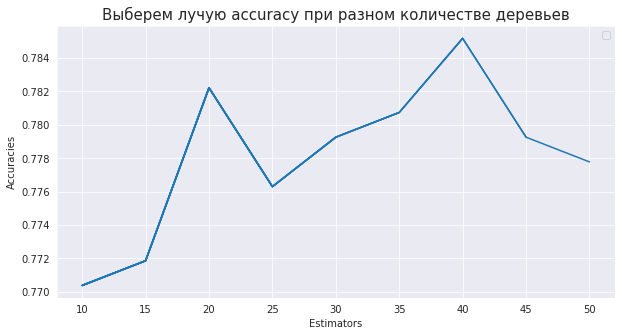

In [9]:
#обучим модель случайный лес с разним количеством деревьев в лесу

estimators = []
RFC_accuracies = []

plt.figure(figsize = (10, 5))

for estim in range(10,51,5):
    model = RandomForestClassifier(random_state = 12345, n_estimators = estim, 
                                  min_weight_fraction_leaf = 0.0, 
                                  max_features = "sqrt", 
                                  max_leaf_nodes = None, 
                                  min_impurity_decrease = 0.0, 
                                  bootstrap = True, oob_score = False, 
                                  n_jobs = None, 
                                  verbose = 0, 
                                   class_weight = None)
    model.fit(train_features, train_target)
    predictions = model.predict(valid_features)
    score = accuracy_score(valid_target, predictions)
    estimators.append(estim)
    RFC_accuracies.append(score)
    print('Estimator=:', estim, end= '')
    print('             Accuracy:', score)
    sns.lineplot(data= pd.DataFrame( data= RFC_accuracies, index = estimators), legend = 'brief')
    plt.legend('')
    
print('\n')
plt.title('Выберем лучую accuracy при разном количестве деревьев',  fontsize = 15)
plt.ylabel('Accuracies')
plt.xlabel('Estimators')
plt.show()

print('\n\n')

Neighbors: [1]            Accuracy: 0.72
Neighbors: [1, 4]            Accuracy: 0.7585185185185185
Neighbors: [1, 4, 7]            Accuracy: 0.7540740740740741


/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

Neighbors: [1, 4, 7, 10]            Accuracy: 0.7585185185185185
Neighbors: [1, 4, 7, 10, 13]            Accuracy: 0.7570370370370371
Neighbors: [1, 4, 7, 10, 13, 16]            Accuracy: 0.7525925925925926
Neighbors: [1, 4, 7, 10, 13, 16, 19]            Accuracy: 0.7540740740740741


/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

Neighbors: [1, 4, 7, 10, 13, 16, 19, 22]            Accuracy: 0.7570370370370371
Neighbors: [1, 4, 7, 10, 13, 16, 19, 22, 25]            Accuracy: 0.7511111111111111




/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


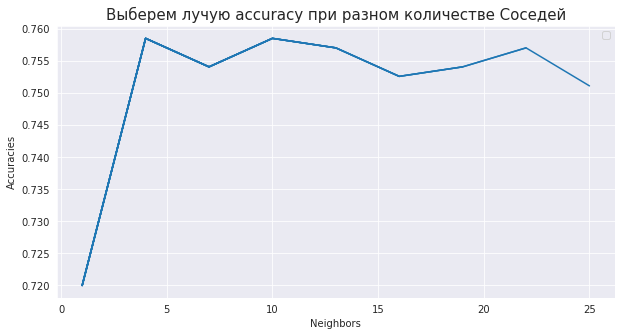

In [10]:
#Обучим модель ближайщих соседей

neighbors_list = []
KNC_accuracies = []
plt.figure(figsize = (10, 5))
    
for neighbors in range(1,28,3):
    model = KNeighborsClassifier(n_neighbors = neighbors)
    model.fit(train_features, train_target)
    predictions = model.predict(valid_features)
    score = accuracy_score(valid_target, predictions)
    neighbors_list.append(neighbors)
    KNC_accuracies.append(score)
    print('Neighbors:', neighbors_list, end= '')
    print('            Accuracy:', score)
    sns.lineplot(data = pd.DataFrame(data = KNC_accuracies, index = neighbors_list),legend = 'brief')
    plt.legend('')
    
print('\n')
plt.title('Выберем лучую accuracy при разном количестве Соседей', fontsize=  15)
plt.xlabel('Neighbors')
plt.ylabel('Accuracies')
plt.show()

print('\n\n')

Neighbors: [1]            Accuracy: 0.72
Neighbors: [1, 4]            Accuracy: 0.7585185185185185
Neighbors: [1, 4, 7]            Accuracy: 0.7540740740740741


/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

Neighbors: [1, 4, 7, 10]            Accuracy: 0.7585185185185185
Neighbors: [1, 4, 7, 10, 13]            Accuracy: 0.7570370370370371
Neighbors: [1, 4, 7, 10, 13, 16]            Accuracy: 0.7525925925925926
Neighbors: [1, 4, 7, 10, 13, 16, 19]            Accuracy: 0.7540740740740741


/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

Neighbors: [1, 4, 7, 10, 13, 16, 19, 22]            Accuracy: 0.7570370370370371
Neighbors: [1, 4, 7, 10, 13, 16, 19, 22, 25]            Accuracy: 0.7511111111111111




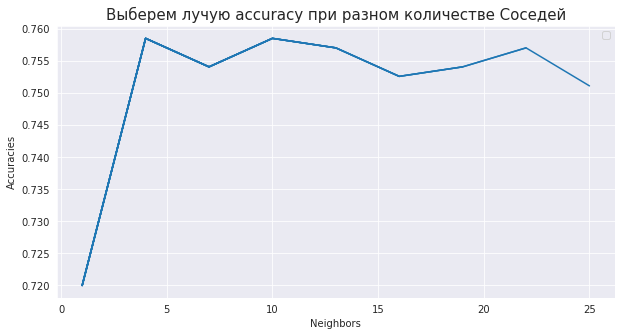

In [11]:
#Обучим модель ближайщих соседей

neighbors_list = []
KNC_accuracies = []
plt.figure(figsize = (10, 5))
    
for neighbors in range(1,28,3):
    model = KNeighborsClassifier(n_neighbors = neighbors,
                                 weights='uniform', 
                                 algorithm='auto', 
                                 leaf_size=30, 
                                 p=2, 
                                 metric='minkowski', 
                                 metric_params=None, 
                                 n_jobs=None)
    
    model.fit(train_features, train_target)
    predictions = model.predict(valid_features)
    score = accuracy_score(valid_target, predictions)
    neighbors_list.append(neighbors)
    KNC_accuracies.append(score)
    print('Neighbors:', neighbors_list, end= '')
    print('            Accuracy:', score)
    sns.lineplot(data = pd.DataFrame(data = KNC_accuracies, index = neighbors_list),legend = 'brief')
    plt.legend('')
    
print('\n')
plt.title('Выберем лучую accuracy при разном количестве Соседей', fontsize=  15)
plt.xlabel('Neighbors')
plt.ylabel('Accuracies')
plt.show()

print('\n\n')

In [12]:
#
columns = ['DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier']

data = pd.DataFrame(columns = columns)

data['DecisionTreeClassifier'] = DTC_accuracies
data['KNeighborsClassifier'] = KNC_accuracies
data['RandomForestClassifier'] = RFC_accuracies

<AxesSubplot:title={'center':'Сравним все модели на одном графике'}, ylabel='Accuracy'>

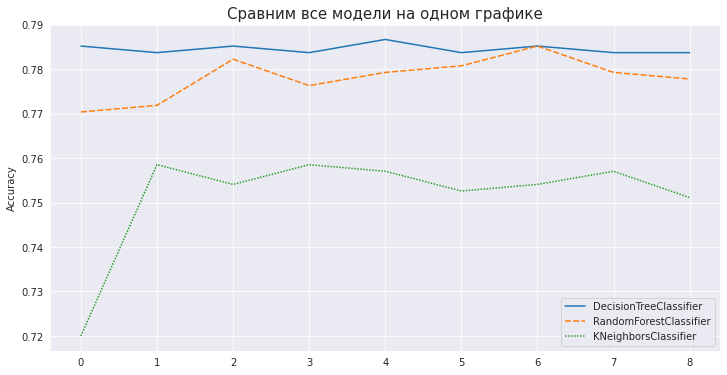

In [13]:
plt.figure(figsize = (12, 6))
plt.title("Сравним все модели на одном графике", fontsize = 15)
plt.xlabel('')
plt.ylabel('Accuracy')
sns.lineplot(data = data)

Вывод:
   - Иследователи три модели: Случайный лес, Ближайшие соседи, Дерево Решений.
   - После исследования мы получили:
        -  дерева решений при 4 деревьях accuracy: 
        - У ближайщих соседей при 10 соседях accuracy: Neighbors 10 Accuracy:
        - У случайного леса при 40 деревьях, accuracy
   - Исходя из полученных результатов на данный момент, можно сказать, что модель "Случайный лес" показывает лучший результат : при 40 деревьях, Accuracy: ~ 0.79
            

## Проверьте модель на тестовой выборке

In [14]:
#Проверим модель: Случайный лес на тестовой выборке при 40 деревьях

model = RandomForestClassifier(random_state = 12345, n_estimators = 40)
model.fit(train_features, train_target)
predictions = model.predict(test_features)
score = accuracy_score(test_targets, predictions)

print('Accuracy:', score)

Accuracy: 0.7931034482758621


## (бонус) Проверьте модели на адекватность

Наша модель показала результат 0.79 - это значит, что наша модель адекватная. И не предсказывает случайным образом.

In [15]:
df['is_ultra'].value_counts(normalize=True)

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

Пусть наша модель всегда будет предсказывать тариф «Смарт». Тогда точность модели будет равна примерно 69%, но точность нашей лучшей модели больше и равна 79%. Можем заключить, что проверка на адекватность пройдена успешно!

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [17]:
from catboost import CatBoostClassifier
import optuna

In [18]:
%pip install optuna

Note: you may need to restart the kernel to use updated packages.


</a><font size="3.5"><b>Подбор гиперпараметров для лучайного Леса</font></b>

Подберем гиперпараметры по максимальной глубине леса и количеству деревьев и минимальному количество примеров для разделения.

In [19]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 101, 10):
    for sample in range(2,5):
        for depth in range (1, 11):
            model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, min_samples_split = sample)
            model.fit(train_features, train_target) 
            valid_predictions = model.predict(valid_features)
            result = accuracy_score(valid_target, valid_predictions) 
            if result > best_result:
                best_model = model
                best_result = result
                best_est = est
                best_depth = depth
                best_split = sample


print("accuracy наилучшей модели на валидационной выборке:", best_result, "Количество деревьев:", best_est, "Максимальная глубина:", depth, "минимальное количество примеров для разделения",best_split)

accuracy наилучшей модели на валидационной выборке: 0.8118518518518518 Количество деревьев: 20 Максимальная глубина: 10 минимальное количество примеров для разделения 4


Итак, Разбиваем на выборки и инициализируем объект **OptunaSearchCV** с условием максимизации метрики f1:

</a><font size="3.5"><b>ВНИМАНИЕ!!!! </font></b>

Здесь, мне надо было ждать около минут пяти

хорошего вам отдыха!

Надеюсь что вам не будет скучно 😅🙏.

In [20]:
clf = CatBoostClassifier(verbose = False)

In [21]:
model = RandomForestClassifier(random_state = 12345)

params_distrs = {'learning_rate': optuna.distributions.FloatDistribution(1e-4, 20),
                'min_data_in_leaf':optuna.distributions.IntDistribution(1, 10),
                'iterations':optuna.distributions.IntDistribution(800, 1200, 100),
                'subsample':optuna.distributions.FloatDistribution(0.7, 0.9),
                
                      }

opt_search = optuna.integration.OptunaSearchCV(clf, params_distrs, cv = 5, n_trials = 50, scoring = 'f1', timeout = 500)

opt_search.fit(train_features, train_target)

/tmp/ipykernel_178/467500640.py:10: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  opt_search = optuna.integration.OptunaSearchCV(clf, params_distrs, cv = 5, n_trials = 50, scoring = 'f1', timeout = 500)
[I 2023-04-12 20:24:01,949] A new study created in memory with name: no-name-e66cb754-2425-4542-bf08-20aea7a84ca6
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
Training has stopped (degenerate solution on iteration 7, probably too small l2-regularization, try to increase it)
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater 

OptunaSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x7fa0cc2abc70>,
               n_trials=50,
               param_distributions={'iterations': IntDistribution(high=1200, log=100, low=800, step=1),
                                    'learning_rate': FloatDistribution(high=20.0, log=False, low=0.0001, step=None),
                                    'min_data_in_leaf': IntDistribution(high=10, log=False, low=1, step=1),
                                    'subsample': FloatDistribution(high=0.9, log=False, low=0.7, step=None)},
               scoring='f1', timeout=500)

In [22]:
opt_search.best_params_

{'learning_rate': 0.017132537824106953,
 'min_data_in_leaf': 6,
 'iterations': 1131,
 'subsample': 0.8128946392752073}

In [23]:
opt_search.best_score_

0.644562016841652

Почему-то так мало

In [24]:
opt_search.best_estimator_

У нас вышло ExparimantalWarning из-за версии

**попробуем еще использовать для случайного леса RandomizedSearchCV**


In [25]:
model = RandomForestClassifier(random_state=12345)
    

param_dict = {'max_depth': range(1, 10),
             'n_estimators': range(10, 201, 10),
             'min_samples_split': range(2,5)}

grid_1 = RandomizedSearchCV(model, param_dict, cv = 5, scoring='accuracy', n_jobs = -1)

grid_1.fit(train_features, train_target)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(1, 10),
                                        'min_samples_split': range(2, 5),
                                        'n_estimators': range(10, 201, 10)},
                   scoring='accuracy')

In [26]:
grid_1.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_split=4, n_estimators=180,
                       random_state=12345)

In [27]:
grid_1.best_score_

0.815484286067805

Полученное сейчас значние выше того, что мы получили ранее в OptunaSearchCV, и немного выше чем на наилучшей моделе валидационной выборки.

</a><font size="3.5"><b>Подбор гиперпараметров для Дерева Решений</font></b>

In [28]:
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state=12345, max_depth = depth) # обучите модель с заданной глубиной дерева
    model.fit(train_features,train_target) # обучите модель
    valid_predictions = model.predict(valid_features) # получите предсказания модели
    result = accuracy_score(valid_target, valid_predictions) # посчитайте качество модели
    print('max_depth =', depth, ':', result)
    print(accuracy_score(valid_target, valid_predictions))  

max_depth = 1 : 0.7422222222222222
0.7422222222222222
max_depth = 2 : 0.7792592592592592
0.7792592592592592
max_depth = 3 : 0.7851851851851852
0.7851851851851852
max_depth = 4 : 0.7807407407407407
0.7807407407407407
max_depth = 5 : 0.7511111111111111
0.7511111111111111
max_depth = 6 : 0.7851851851851852
0.7851851851851852
max_depth = 7 : 0.7851851851851852
0.7851851851851852
max_depth = 8 : 0.7837037037037037
0.7837037037037037
max_depth = 9 : 0.7822222222222223
0.7822222222222223


Увеличивая глубину - точность не растёт. Модель переобучается. Сделаем вывод, что **лучшая глубина для данной модели - 3.**

In [29]:
model = DecisionTreeClassifier(random_state =12345)

param_dict = {"max_depth": range(1, 10)}

grid_2 = GridSearchCV(model, param_dict, cv =5, scoring = 'accuracy', n_jobs = -1)

grid_2.fit(train_features, train_target)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=12345),
             n_jobs=-1, param_grid={'max_depth': range(1, 10)},
             scoring='accuracy')

In [30]:
grid_2.best_estimator_

DecisionTreeClassifier(max_depth=3, random_state=12345)

In [31]:
grid_2.best_score_

0.7959188319722841

Результат выше, чем при лучшей значение глубины - 3

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.









- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
